## The goal is to complete the tasks based off the 538 article and see if I am able to reach a similar conclusion. The background of the analysis is contained in this article  https://fivethirtyeight.com/features/fandango-movies-ratings/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Fandango = pd.read_csv('C://Users//Kehinde Emmanuel//Downloads//PY4DS&MLUDEMYCOURSE//06-Capstone-Project//fandango_scrape.csv')

In [3]:
Fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
Fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
Fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Checking out the relationship between the popularity of a film and its rating. This will be done with a scatter plot

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

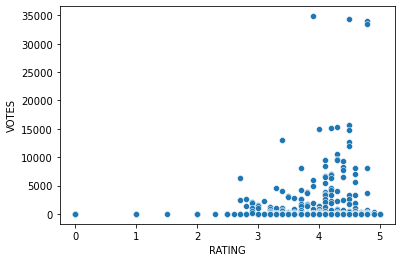

In [6]:
sns.scatterplot(data = Fandango, y = 'VOTES', x = 'RATING')

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

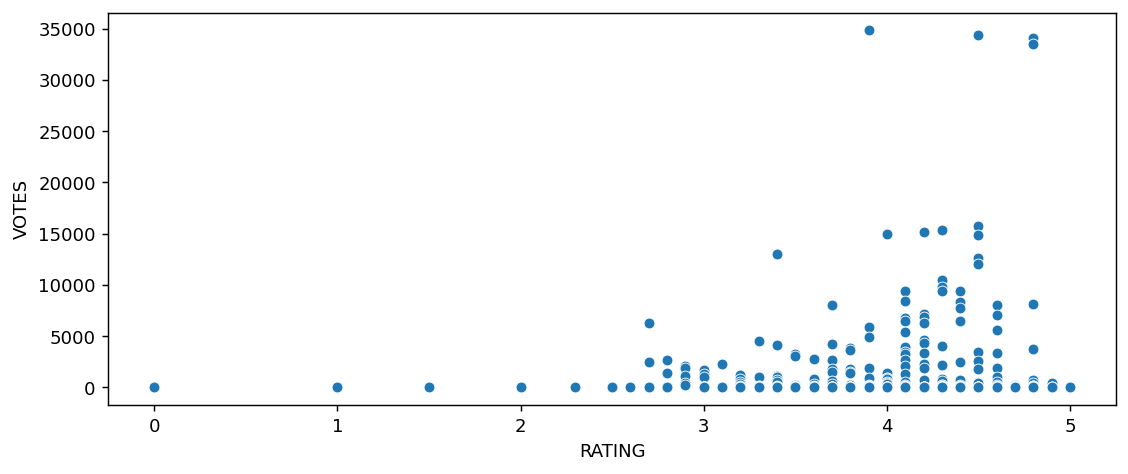

In [7]:
plt.figure(figsize = (10, 4), dpi = 130)

sns.scatterplot(data = Fandango, y = 'VOTES', x = 'RATING')

### Calculating the Correlation between Columns

In [8]:
Fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
#The stars and the rating are not perfecetly correlated. There is a great discrepancy between the stars being shown to the
#users and the actual rating

### We want to create a new column that is able to strip the year from the title strings and set this new column as YEAR. 
Assume that every row in the FILM title column has the same format: Film Title Name (Year)

In [10]:
Fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [11]:
#So if we have Film Title Name (Year), we can create a custom function to strip the year part

title = 'Film Title Name (Year)'

In [12]:
title.split('(')   #We splited based on the first parenthesis

['Film Title Name ', 'Year)']

In [13]:
title.split('(')[-1] #This is to get the last item in the list

'Year)'

In [14]:
title.split('(')[-1].replace(')', '')  #To take out the parenthesis, we will replace with an empty space

'Year'

In [15]:
#We created the YEAR column here applying our custom function

Fandango['YEAR'] = Fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))

In [16]:
Fandango  #Although this year column is a string. It is still usable for this purpose

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


### The Number of Movies in the Fandango DataFrame per year

In [17]:
Fandango['YEAR'].value_counts()

2015    478
2014     23
2012      1
1964      1
2016      1
Name: YEAR, dtype: int64

### Visualizing the Count of movies per year with a plot 

<AxesSubplot:xlabel='YEAR', ylabel='count'>

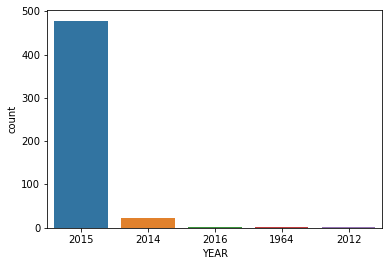

In [18]:
sns.countplot(data = Fandango, x = 'YEAR')

### What are the 10 movies with the highest number of Votes?

In [19]:
Fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### How many movies have Zero Votes?

In [20]:
Fandango['VOTES'] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
499     True
500     True
501     True
502     True
503     True
Name: VOTES, Length: 504, dtype: bool

In [21]:
no_votes = Fandango['VOTES'] == 0

no_votes.sum()

#Alternatively len(Fandango[Fandango['VOTES'] == 0])

69

### Create a DataFrame of only reviewed films by removing any films that have zero votes

In [22]:
#Creating a new DF called fan_reviewed

fan_reviewed = Fandango[Fandango['VOTES'] > 0]

fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


### As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.

TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.

<AxesSubplot:xlabel='RATING', ylabel='Density'>

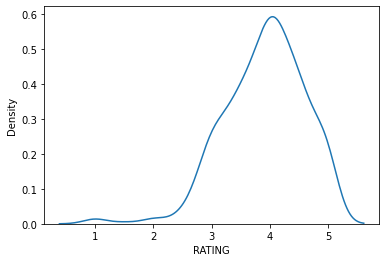

In [23]:
sns.kdeplot(data = fan_reviewed, x = 'RATING')

<AxesSubplot:xlabel='RATING', ylabel='Density'>

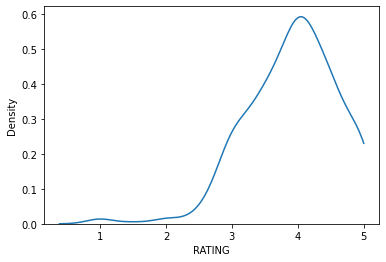

In [24]:
#The chart extends beyond 5, to correct that, we will clip the kde

sns.kdeplot(data = fan_reviewed, x = 'RATING', clip = [0, 5])

<AxesSubplot:xlabel='RATING', ylabel='Density'>

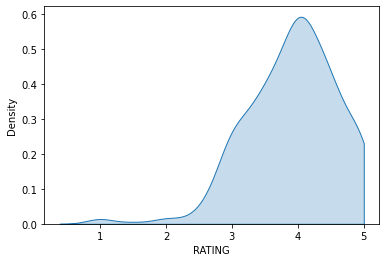

In [25]:
#We set fill to True and Label to True Rating

sns.kdeplot(data = fan_reviewed, x = 'RATING', clip = [0, 5], fill = True, label = 'True Rating')

<AxesSubplot:xlabel='RATING', ylabel='Density'>

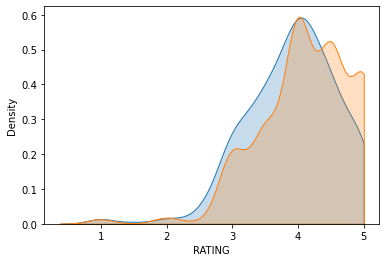

In [26]:
sns.kdeplot(data = fan_reviewed, x = 'RATING', clip = [0, 5], fill = True, label = 'True Rating')
sns.kdeplot(data = fan_reviewed, x = 'STARS', clip = [0, 5], fill = True, label = 'Stars Displayed')

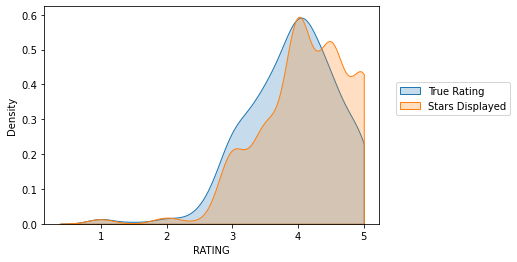

In [27]:
#To see the labels

sns.kdeplot(data = fan_reviewed, x = 'RATING', clip = [0, 5], fill = True, label = 'True Rating')
sns.kdeplot(data = fan_reviewed, x = 'STARS', clip = [0, 5], fill = True, label = 'Stars Displayed')

plt.legend(loc = (1.05, 0.5))

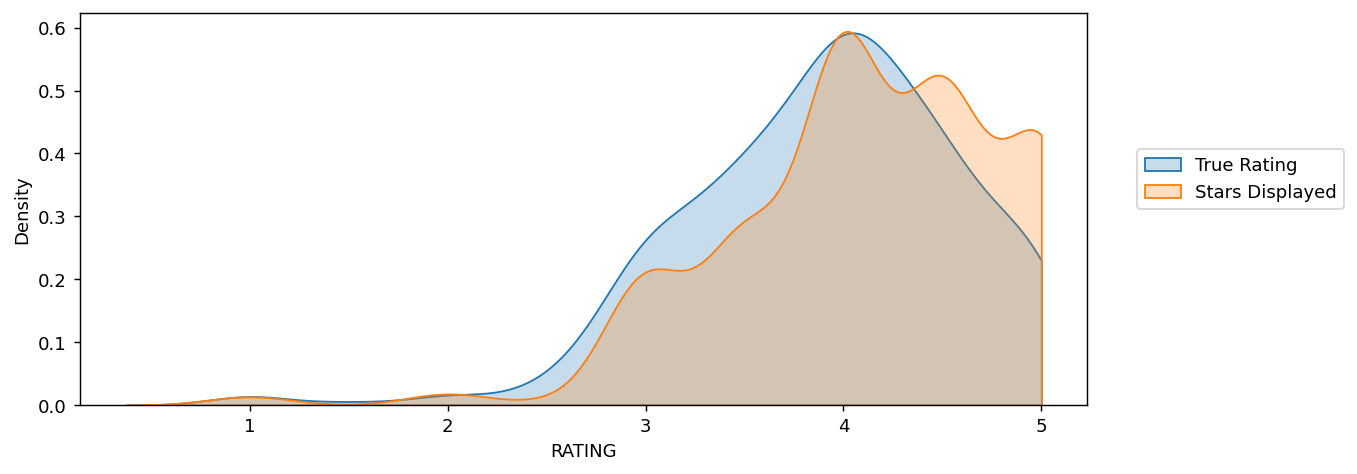

In [28]:
#To make clearer

plt.figure(figsize = (10, 4), dpi = 130)


sns.kdeplot(data = fan_reviewed, x = 'RATING', clip = [0, 5], fill = True, label = 'True Rating')
sns.kdeplot(data = fan_reviewed, x = 'STARS', clip = [0, 5], fill = True, label = 'Stars Displayed')

plt.legend(loc = (1.05, 0.5))

### To quantify the discrepancy, Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.

In [29]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

<ipython-input-29-cc8a3df60ecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [30]:
#The error above is just a warning, not technically an error. It is warning us that the fan_reviewed is a copy of a slice
#from the Fandango DataFrame. every otherthing works

fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [31]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

<ipython-input-31-5b305d3aea42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [32]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### Create a count plot to display the number of times a certain difference occurs

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

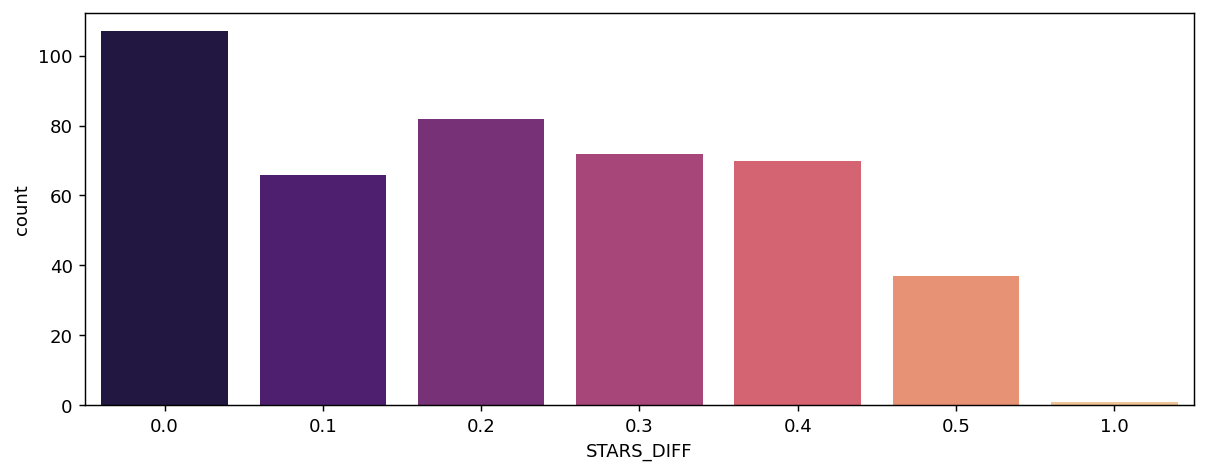

In [33]:
plt.figure(figsize = (11, 4), dpi = 130)

sns.countplot(data = fan_reviewed, x = 'STARS_DIFF', palette = 'magma')

### We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?

In [34]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites
We want to compare the scores from Fandango to other movies sites and see how they compare.

In [35]:
all_sites = pd.read_csv('C://Users//Kehinde Emmanuel//Downloads//PY4DS&MLUDEMYCOURSE//06-Capstone-Project//all_sites_scores.csv')

In [36]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [37]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [38]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### On a general note, Rotten Tomatoes has two sets of reviews; their critics reviews(rating published by official critics) and user reviews

### Create a Scatter plot exploring the relationship between RT Critic reviews and RT User reviews

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

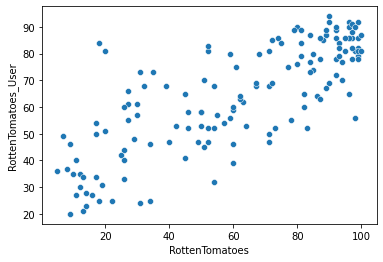

In [39]:
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')

(0.0, 100.0)

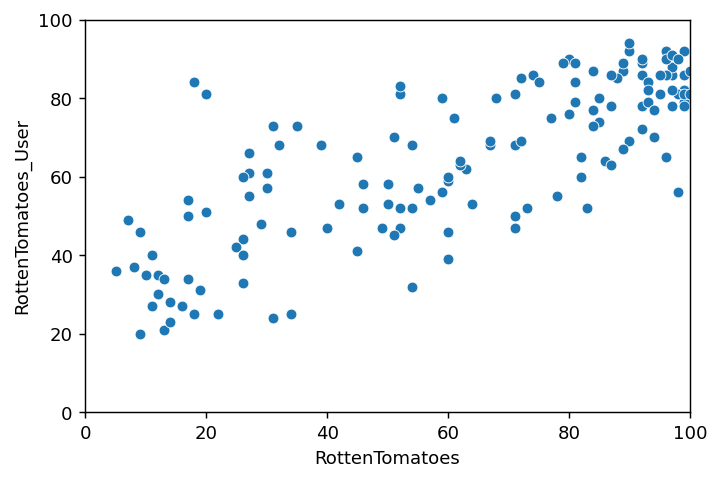

In [40]:
plt.figure(dpi = 130)

sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')

plt.ylim(0, 100)
plt.xlim(0, 100)

## Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes - RottenTomatoes_User

In [41]:
all_sites['Rotten_difference'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [42]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


### Now Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.

In [43]:
all_sites['Rotten_difference'].apply(abs).mean()

15.095890410958905

### Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.

<AxesSubplot:xlabel='Rotten_difference', ylabel='Count'>

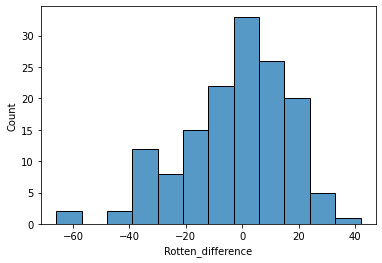

In [44]:
sns.histplot(data = all_sites, x = 'Rotten_difference')

<AxesSubplot:xlabel='Rotten_difference', ylabel='Count'>

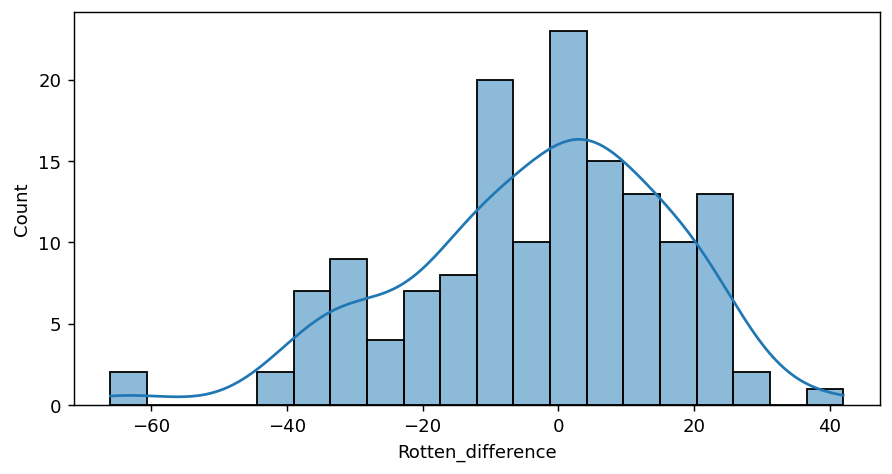

In [45]:
plt.figure(figsize = (8, 4),dpi = 130)

sns.histplot(data = all_sites, x = 'Rotten_difference', kde = True, bins = 20)

### Now create a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

<AxesSubplot:xlabel='Rotten_difference', ylabel='Count'>

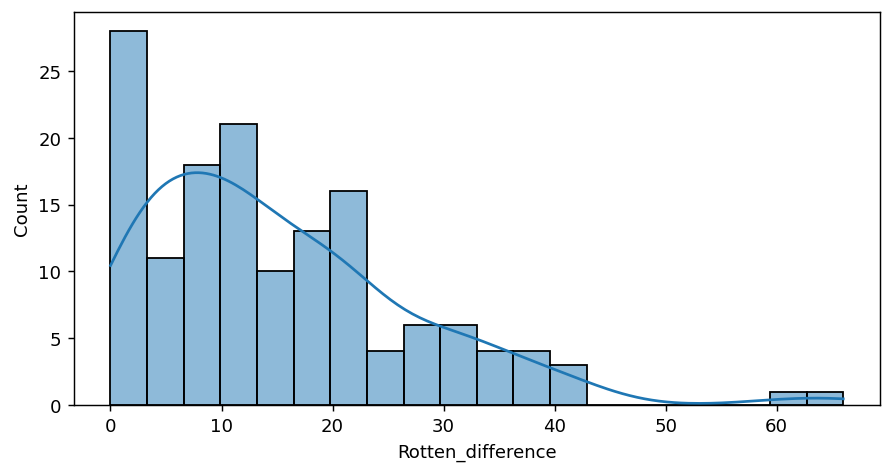

In [46]:
plt.figure(figsize = (8, 4),dpi = 130)

sns.histplot(data = all_sites, x = all_sites['Rotten_difference'].apply(abs), kde = True, bins = 20)

### What are the top 5 movies users rated higher than critics on average:

In [47]:
all_sites.nsmallest(5, 'Rotten_difference')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_difference
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [48]:
all_sites.nsmallest(5, 'Rotten_difference') ['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

### Now show the top 5 movies critics scores higher than users on average.

In [49]:
all_sites.nlargest(5, 'Rotten_difference') ['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

### Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.

(0.0, 100.0)

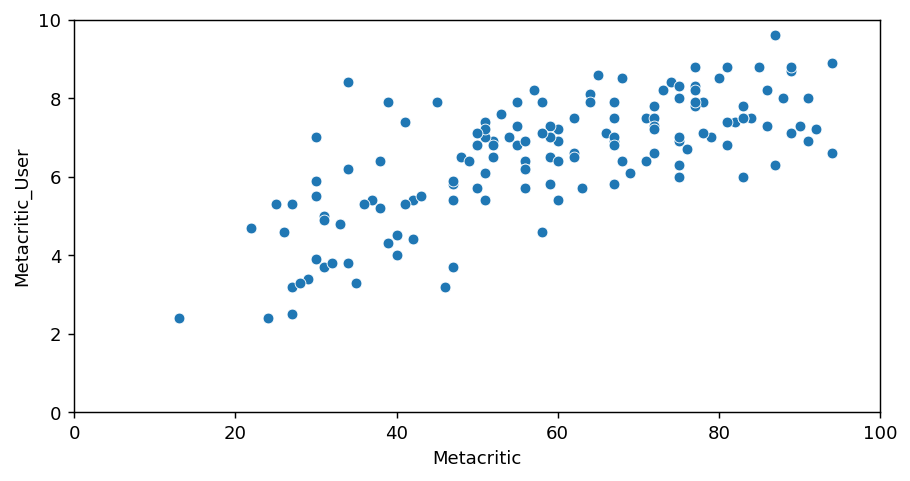

In [50]:
plt.figure(figsize = (8, 4), dpi = 130)

sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')

plt.ylim(0, 10)
plt.xlim(0, 100)

### Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

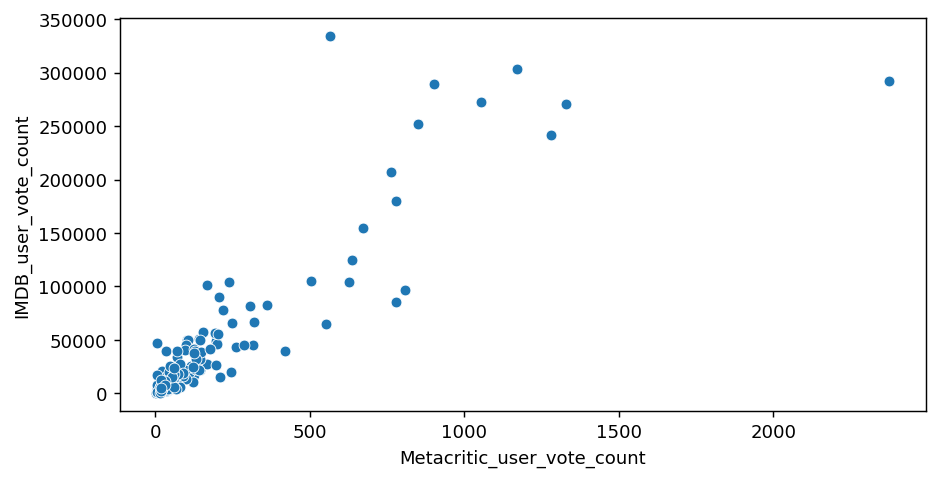

In [51]:
plt.figure(figsize = (8, 4), dpi = 130)

sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')



### From the above, there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?

What movie has the highest IMDB user vote count?

In [52]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_difference
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


### What movie has the highest Metacritic User Vote count?

In [53]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_difference
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### The last part of the project. Here we want to know whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales. The task is to combine the Fandango Table with the All Sites table. It is however important to note that not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames. So we will do an inner merge to merge together both DataFrames based on the FILM columns.

In [54]:
#creating a new data frame called pd.merge. We used inner cos we only want the movies that are present in fandango&all_sites

df = pd.merge(Fandango, all_sites, on = 'FILM', how = 'inner')

In [55]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_difference
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


### Normalizing columns to Fandango STARS and RATINGS 0-5
Notice that RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

The task is to Create a new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this. Keep in mind, a simple way to convert ratings:

100/20 = 5
10/2 = 5

In [56]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_difference                 42.0
Name: max, dtype: float64

In [57]:
#From the above, we can see that RottenTomatoes and RottenTomatoes user is between 0 - 100, so it is safe to dived by 20

df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [58]:
#Metacritic goes from 0 - 10, so it will be divided by 2 to standardised it to 5. We are rounding it up by 1

df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [59]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [60]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_difference,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [61]:
#FRom the above, we have a normalized columns for the ratings.

### Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.

In [62]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [63]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


## Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but we will explore the Seaborn KDEplot docs for some simple ways to quickly show this. 

<AxesSubplot:ylabel='Density'>

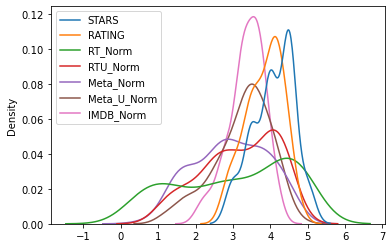

In [64]:
sns.kdeplot(data = norm_scores)

<AxesSubplot:ylabel='Density'>

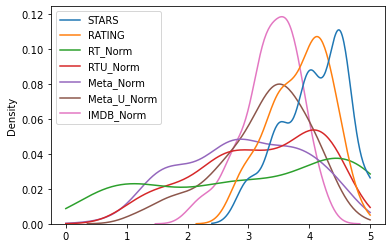

In [65]:
#We wanna clip this from 0 to 5

sns.kdeplot(data = norm_scores, clip = [0, 5])

<AxesSubplot:ylabel='Density'>

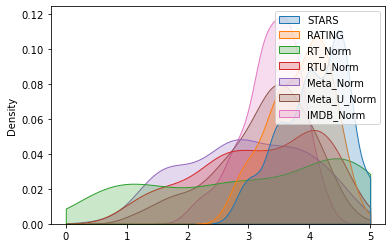

In [66]:
sns.kdeplot(data = norm_scores, clip = [0, 5], shade = True)

<AxesSubplot:ylabel='Density'>

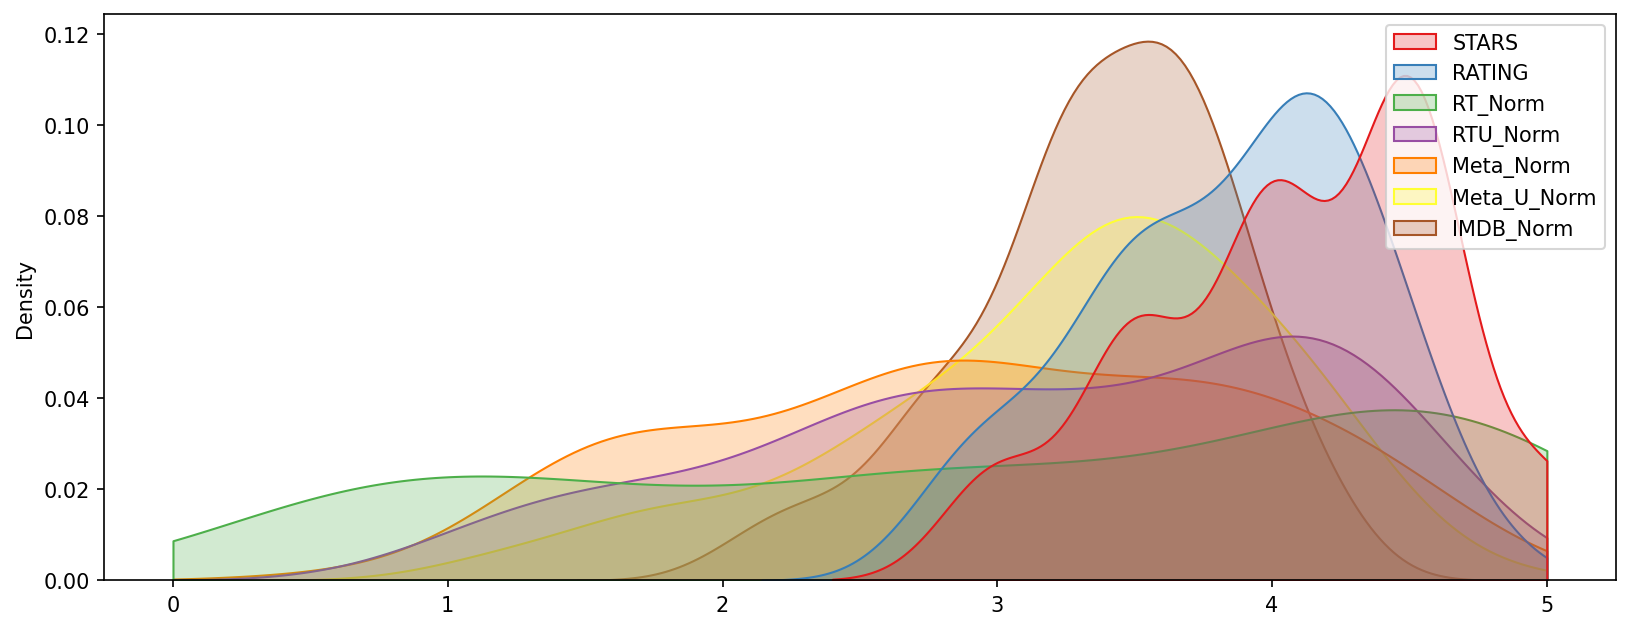

In [67]:
plt.figure(figsize = (13, 5), dpi = 150)

sns.kdeplot(data = norm_scores, clip = [0, 5], shade = True, palette = 'Set1')


#From the chart below, we can see that the stars and the ratings are more higher on the average than all the other movies.
#It is evident that Fandango is rating movies a little bit higher. Done on purpose or not? That we can't say

### To move the legend to the upper left, we cannot use the regular
#plt.legend(loc = 1.05, 0.5). It will give us an error. The Creator of Seaborn library gave a set of code that could be
#used to fix this. The link to the code is  https://github.com/mwaskom/seaborn/issues/2280

I copied the code and adjusted as needed from mwaskom

In [69]:
#All code copied 

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
move_legend(ax, "upper left")

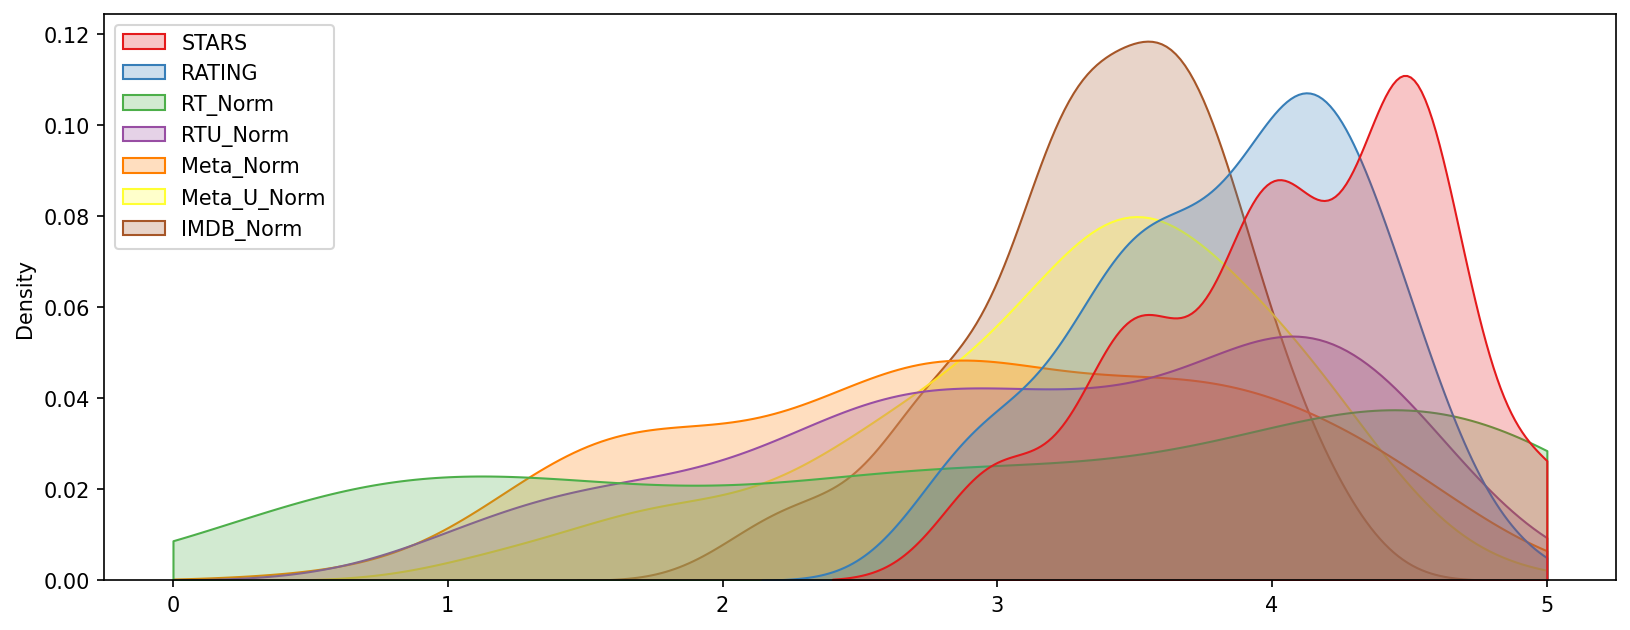

In [70]:
fig, ax = plt.subplots(figsize = (13, 5), dpi = 150)     #Copied code from the link

sns.kdeplot(data = norm_scores, clip = [0, 5], shade = True, palette = 'Set1')

move_legend(ax, "upper left")    #Copied code from the link

## Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

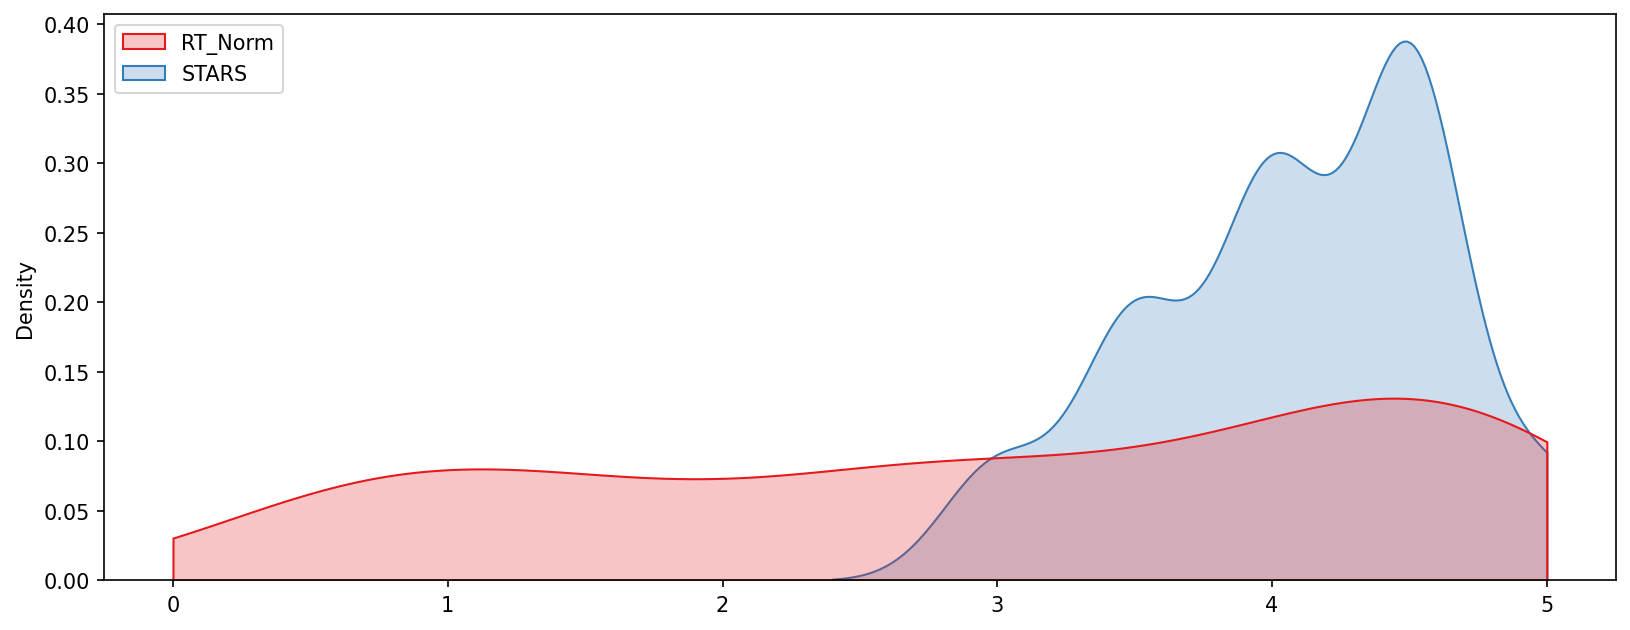

In [71]:
fig, ax = plt.subplots(figsize = (13, 5), dpi = 150)     #Copied code from the link

sns.kdeplot(data = norm_scores[['RT_Norm', 'STARS']], clip = [0, 5], shade = True, palette = 'Set1')

move_legend(ax, "upper left") 

### Create a histplot comparing all normalized scores.

<AxesSubplot:ylabel='Count'>

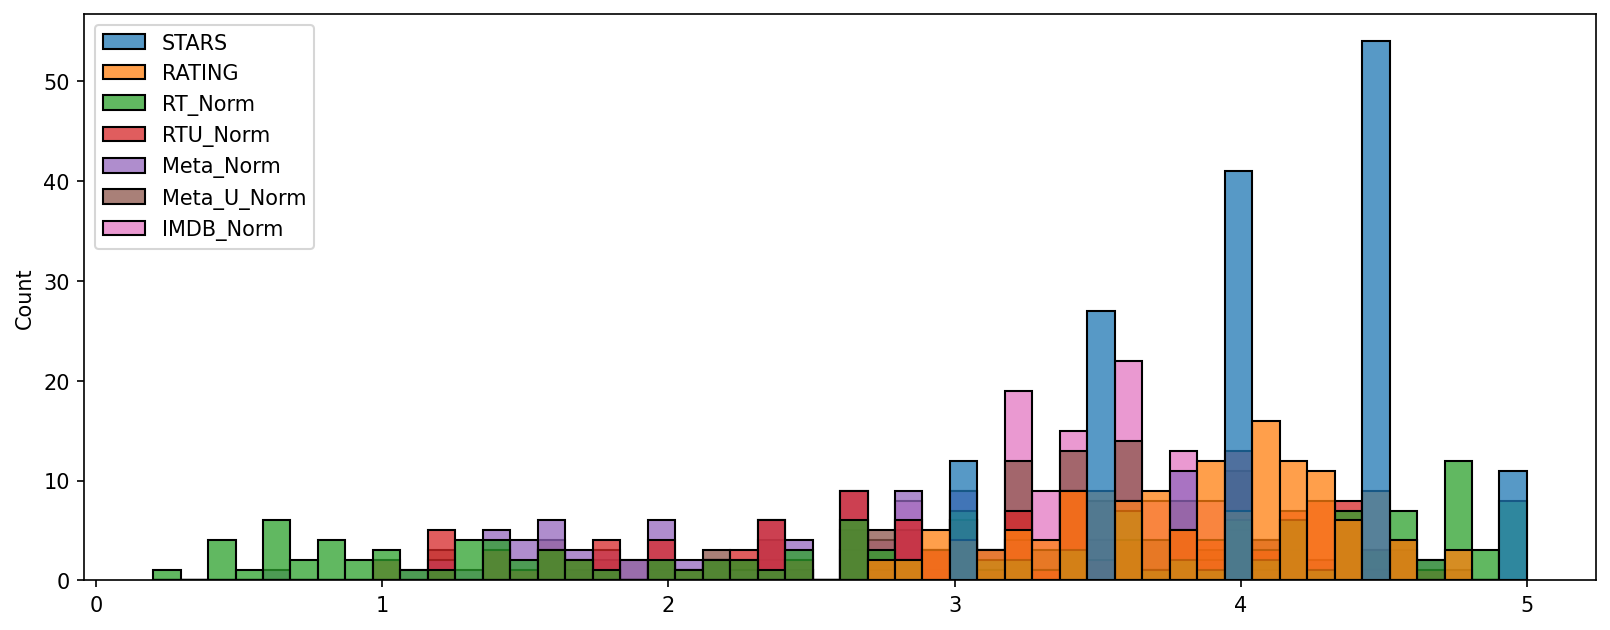

In [74]:
plt.figure(figsize = (13, 5), dpi = 150)

sns.histplot(norm_scores, bins = 50)

### How are the worst movies rated across all platforms?

Here we need to create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. 

Note: This clustermap does not need to have the FILM titles as the index. We can drop it for the clustermap.

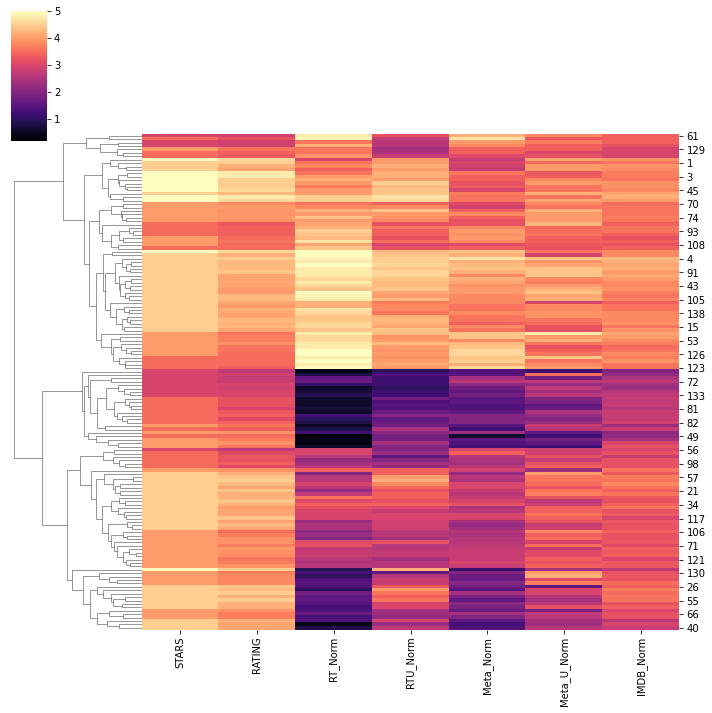

In [75]:
sns.clustermap(norm_scores, cmap = 'magma', col_cluster = False)     #cmap is color mapping

###  Clearly, from the above, Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. 

### Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? 

What are the normalized scores across all platforms for these movies? 

Here we may need to add the FILM column back in to our DataFrame of normalized scores to see the results.

In [76]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [77]:
norm_films = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [78]:
norm_films.nsmallest(10, 'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


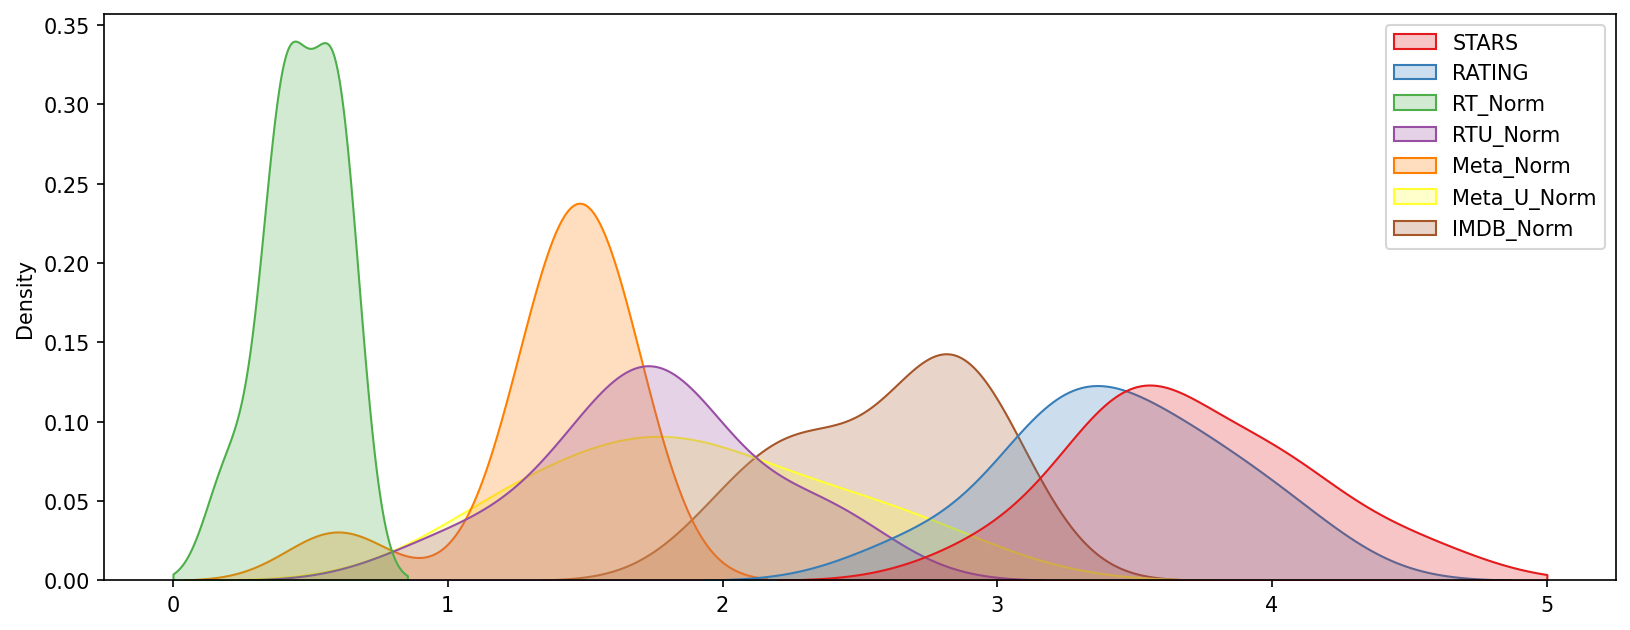

In [80]:
#Visualizing the worst movies here

worst_films = norm_films.nsmallest(10, 'RT_Norm')

fig, ax = plt.subplots(figsize = (13, 5), dpi = 150)     #Copied code from the link

sns.kdeplot(data = worst_films, clip = [0, 5], shade = True, palette = 'Set1')

move_legend(ax, "upper right") 

In [82]:
#From the chart, we can see that Fandango still rated the the 10 worst movies between 3 - 5. For instance, from the worst
#ten, the movie "Taken 3" was rated by fandango at 4.5 contrary to everyother ratings far below that.
#Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!


norm_films.iloc[25]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
Name: 25, dtype: object

In [83]:
0.4 + 2.3 + 1.3 + 2.3 + 3

9.3

In [84]:
9.3/5

1.86